In [7]:
import yfinance as yf
import matplotlib.pyplot as plt



In [3]:
tickers = ['TSLA', 'BND', 'SPY']

# Fetch historical data from January 1, 2015 to October 31, 2024
data = yf.download(tickers, start='2015-01-01', end='2024-10-31')

# Display the first few rows of data
print(data.head())

[*********************100%***********************]  3 of 3 completed

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358757  173.173752  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542728  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726715  168.444626  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765018  170.543671  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665405  173.569931  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with forward fill method (or choose another method)
data = data.fillna(method='ffill')

# Basic statistical analysis
print(data.describe())


Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      70.089252   310.253153   111.438965    80.316039   330.623634   
std        4.889918   111.250657   110.120450     5.097592   103.324179   
min       62.637539   157.328568     9.578000    68.040001   182.860001   
25%       66.314104   214.822353    17.066167    76.379997   242.130001   
50%       68.888931   275.8123

/tmp/ipykernel_8503/1440324995.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


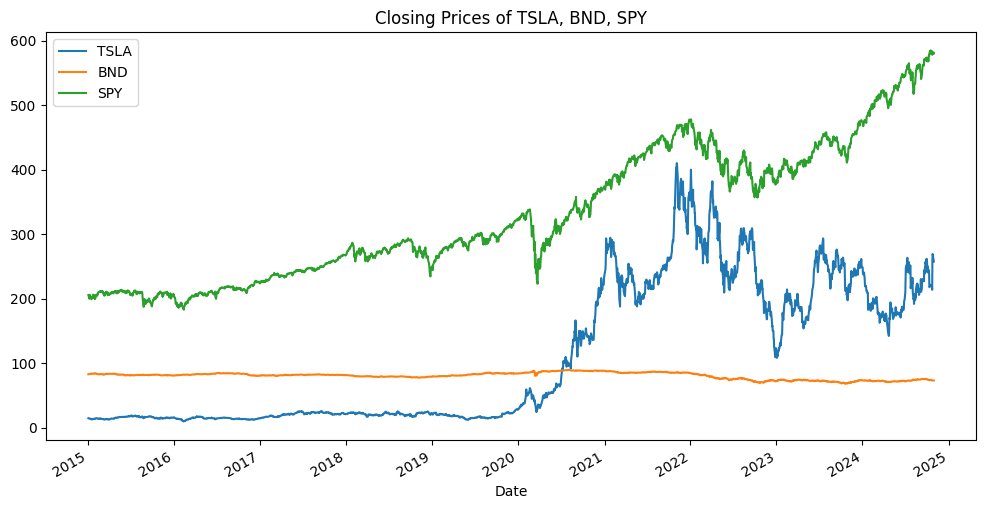

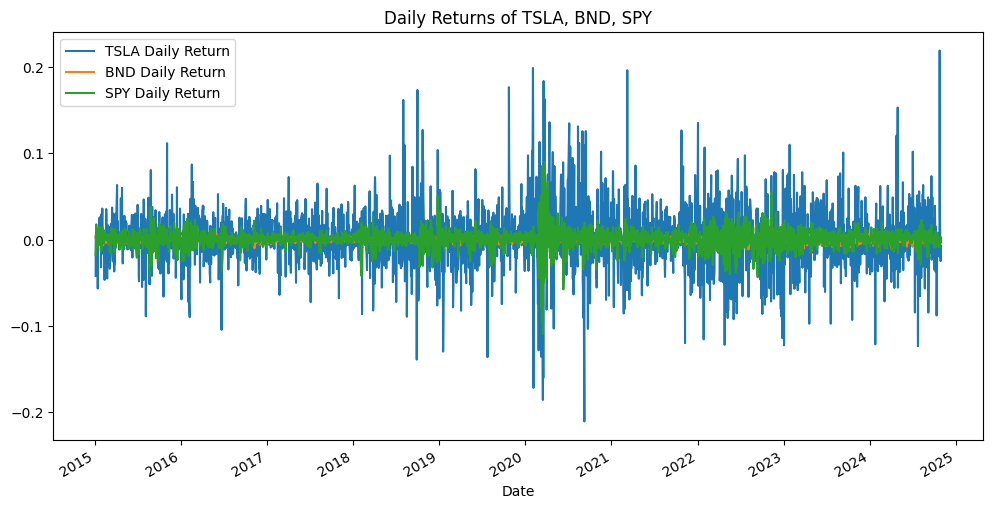

In [8]:
# Plot closing prices of each asset
data['Close']['TSLA'].plot(label='TSLA', figsize=(12, 6))
data['Close']['BND'].plot(label='BND')
data['Close']['SPY'].plot(label='SPY')
plt.title('Closing Prices of TSLA, BND, SPY')
plt.legend()
plt.show()

# Calculate daily returns and plot
daily_returns = data['Close'].pct_change()
daily_returns['TSLA'].plot(label='TSLA Daily Return', figsize=(12, 6))
daily_returns['BND'].plot(label='BND Daily Return')
daily_returns['SPY'].plot(label='SPY Daily Return')
plt.title('Daily Returns of TSLA, BND, SPY')
plt.legend()
plt.show()


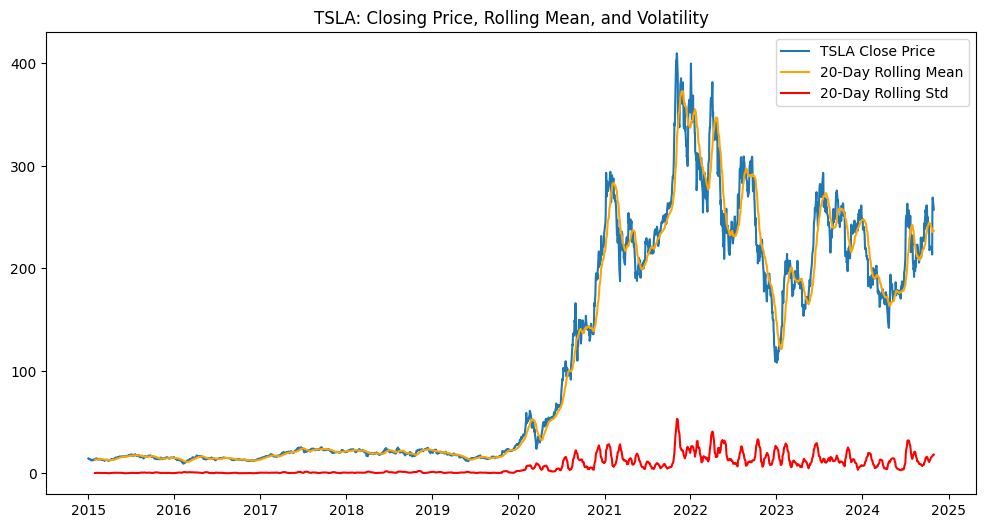

In [9]:
# Calculate rolling mean and standard deviation (e.g., 20-day window)
rolling_mean_tsla = data['Close']['TSLA'].rolling(window=20).mean()
rolling_std_tsla = data['Close']['TSLA'].rolling(window=20).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(data['Close']['TSLA'], label='TSLA Close Price')
plt.plot(rolling_mean_tsla, label='20-Day Rolling Mean', color='orange')
plt.plot(rolling_std_tsla, label='20-Day Rolling Std', color='red')
plt.title('TSLA: Closing Price, Rolling Mean, and Volatility')
plt.legend()
plt.show()
